In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Распределение Парето

По определению распределение Парето для случайной величины $X$ задается равенством:$$F_X(x)=P(X<x)=1-(\frac{x_m}{x})^k,$$ где $x_m$ - наименьшее значение $X$,<br>$k$ - параметр формы,<br>$x_m,k>0$.
<br>При этом для распределения Парето матожидание вычисляется следующим образом: 
$$EX=\begin{cases}
\frac{k*x_m}{k-1} &\text{для $k>1$,}\\
\infty &\text{для $k\leq1$.}
\end{cases}
$$
<br>Дисперсия: 
$$DX=\begin{cases}
(\frac{x_m}{k-1})^2*\frac{k}{k-2} &\text{для $k>2$,}\\
\infty &\text{для $k\leq2$.}
\end{cases}
$$

# Сравнение теоретической плотности распределения и выборочной плотности

Сгенерируем выборку объемом 1000 из распределения Парето с параметрами $x_m=1$ и $k=3$.

In [46]:
k=3
x_m=1
pareto_rv=sts.pareto(k,scale=x_m)
samples=pareto_rv.rvs(1000)

Гистограмма выборки и ее теоретическое распределение:

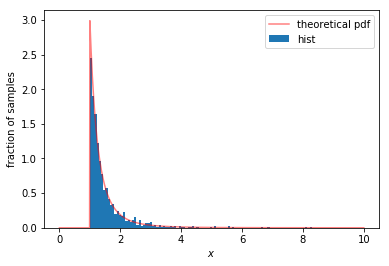

In [135]:
plt.hist(samples, bins=100, normed=True, label='hist')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
x=np.linspace(0,10,1000)
pdf=pareto_rv.pdf(x)
plt.plot(x, pdf, color='red', label='theoretical pdf', alpha=0.5)
plt.legend()

# Распределение выборочного среднего при объеме выборок $n=5$

Сгенерируем 1000 выборок объемом 5 и найдем для них выборочные средние.

In [95]:
n=5
sample_means=[]
for i in range(1000):
    samples=pareto_rv.rvs(n)
    sample_means.append(sum(samples)/n)

Согласно центральной предельной теореме, распределение выборочных средних приближается к нормальному распределению $N(EX,\frac{DX}{n})$, где $\frac{DX}{n}=\sigma^2$.
<br>Из первого раздела следует, что математическое ожидание для распределения Парето с параметрами $x_m=1$, $k=3$ вычисляется по формуле:
$$EX=\frac{k*x_m}{k-1}=\frac{3*1}{3-1}=1.5.$$ 
Дисперсия начального распределения:
$$DX=(\frac{x_m}{k-1})^2*\frac{k}{k-2}=(\frac{1}{3-1})^2*\frac{3}{3-2}=0.75.$$
Тогда среднеквадратическое отклонение для выборок размером $n=5$: $\sigma=\sqrt{\frac{DX}{n}}=\sqrt{\frac{0.75}{5}}=0.387$.
<br> Таким образом, распределение выборочных средних для выборок объема 5 должно подчиняться нормальному распределению $N(1.5,0.15)$.

Оценим распределение выборочных средних с помощью гистограммы и сравним его с теоретическим распределением, подчиняющимся центральной предельной теореме.

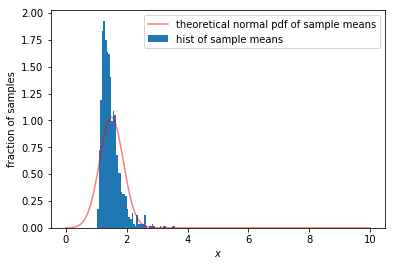

In [96]:
plt.hist(sample_means, bins=50, normed=True, label='hist of sample means')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
norm_rv=sts.norm(1.5, 0.387)
x=np.linspace(0,10,1000)
pdf=norm_rv.pdf(x)
plt.plot(x, pdf, color='red', label='theoretical normal pdf of sample means', alpha=0.5)
plt.legend()

# Распределение выборочного среднего при объеме выборок $n=10$

Сгенерируем 1000 выборок объемом 10 и найдем для них выборочные средние.

In [97]:
n=10
sample_means=[]
for i in range(1000):
    samples=pareto_rv.rvs(n)
    sample_means.append(sum(samples)/n)

Нормальное распределение выборочных средних будет отличаться лишь вторым параметром: $N(EX,\frac{DX}{10})=N(1.5,\frac{0.75}{10})=N(1.5,0.075)$.
<br>Тогда среднеквадратическое отклонение для выборок размером $n=10$: $\sigma=\sqrt{0.075}=0.274$.

Оценим распределение выборочных средних с помощью гистограммы и сравним его с теоретическим распределением, подчиняющимся центральной предельной теореме.

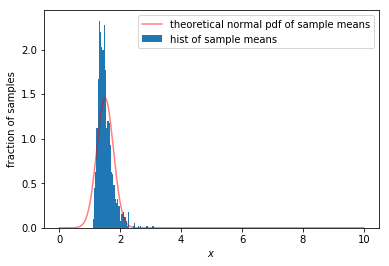

In [98]:
plt.hist(sample_means, bins=50, normed=True, label='hist of sample means')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
norm_rv=sts.norm(1.5, 0.274)
x=np.linspace(0,10,1000)
pdf=norm_rv.pdf(x)
plt.plot(x, pdf, color='red', label='theoretical normal pdf of sample means', alpha=0.5)
plt.legend()

# Распределение выборочного среднего при объеме выборок $n=100$

In [93]:
n=100
sample_means=[]
for i in range(1000):
    samples=pareto_rv.rvs(n)
    sample_means.append(sum(samples)/n)

Нормальное распределение выборочных средних будет иметь параметры: $N(EX,\frac{DX}{100})=N(1.5,\frac{0.75}{100})=N(1.5,0.0075)$.
<br>Тогда среднеквадратическое отклонение для выборок размером $n=10$: $\sigma=\sqrt{0.0075}=0.087$.

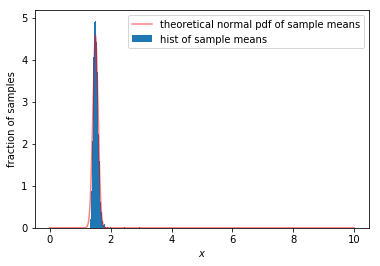

In [94]:
plt.hist(sample_means, bins=50, normed=True, label='hist of sample means')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
norm_rv=sts.norm(1.5, 0.087)
x=np.linspace(0,10,1000)
pdf=norm_rv.pdf(x)
plt.plot(x, pdf, color='red', label='theoretical normal pdf of sample means', alpha=0.5)
plt.legend()

# Распределение выборочного среднего при объеме выборок $n=500$

In [123]:
n=500
sample_means=[]
for i in range(1000):
    samples=pareto_rv.rvs(n)
    sample_means.append(sum(samples)/n)

Нормальное распределение выборочных средних будет иметь параметры: $N(EX,\frac{DX}{500})=N(1.5,\frac{0.75}{500})=N(1.5,0.0015)$.
<br>Тогда среднеквадратическое отклонение для выборок размером $n=10$: $\sigma=\sqrt{0.0015}=0.039$.

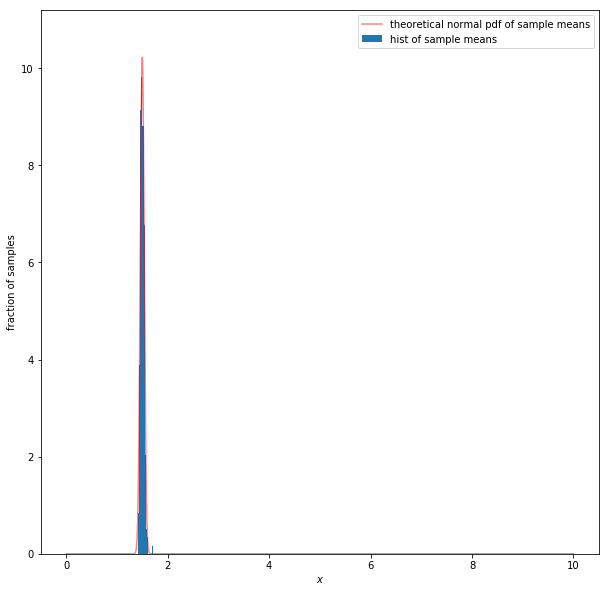

In [125]:
fig= plt.figure(figsize=(10,10))
plt.hist(sample_means, bins=50, normed=True, label='hist of sample means')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
norm_rv=sts.norm(1.5, 0.039)
x=np.linspace(0,10,1000)
pdf=norm_rv.pdf(x)
plt.plot(x, pdf, color='red', label='theoretical normal pdf of sample means', alpha=0.5)
plt.legend()

# Выводы

По полученным графикам видно, что при увеличении объема выборок мода нормального распределения выборочных средних не изменяется, график сужается и концентрируется вокруг $x=1.5$ - медианы, матожидания, или моды. При этом и гистограмма плотности распределения выборочных средних с увеличением $n$ приобретает очертания графика плотности нормального распределения, а пик гистограммы начинает сходиться с пиком графика плотности. 
<br>То есть при увеличении $n$ повышается точность аппроксимации распределения выборочных средних. Однако это происходит медленно из-за несимметричности исходного распределения.